In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from scipy import stats
from folium.plugins import HeatMap

In [2]:
#load data
data = pd.read_csv('full_data.csv')
data.head()
print(data.columns.tolist())

['Unnamed: 0', 'id', 'status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [4]:
# wybranie danych
data_full = data[['id', 'status_group', 'amount_tsh', 'date_recorded', 'gps_height',
 'longitude', 'latitude', 'basin', 'region', 'ward', 'population', 'public_meeting',
 'scheme_management', 'permit', 'construction_year', 'extraction_type', 'management',
 'payment', 'payment_type', 'water_quality', 'quantity', 'quantity_group', 'source',
 'waterpoint_type']]

data_full.head()
#data_full.columns

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region,ward,...,construction_year,extraction_type,management,payment,payment_type,water_quality,quantity,quantity_group,source,waterpoint_type
0,69572,functional,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,Iringa,Mundindi,...,1999,gravity,vwc,pay annually,annually,soft,enough,enough,spring,communal standpipe
1,8776,functional,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,Mara,Natta,...,2010,gravity,wug,never pay,never pay,soft,insufficient,insufficient,rainwater harvesting,communal standpipe
2,34310,functional,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,Manyara,Ngorika,...,2009,gravity,vwc,pay per bucket,per bucket,soft,enough,enough,dam,communal standpipe multiple
3,67743,non functional,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,...,1986,submersible,vwc,never pay,never pay,soft,dry,dry,machine dbh,communal standpipe multiple
4,19728,functional,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,Kagera,Nyakasimbi,...,0,gravity,other,never pay,never pay,soft,seasonal,seasonal,rainwater harvesting,communal standpipe


In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   status_group       59400 non-null  object 
 2   amount_tsh         59400 non-null  float64
 3   date_recorded      59400 non-null  object 
 4   gps_height         59400 non-null  int64  
 5   longitude          59400 non-null  float64
 6   latitude           59400 non-null  float64
 7   basin              59400 non-null  object 
 8   region             59400 non-null  object 
 9   ward               59400 non-null  object 
 10  population         59400 non-null  int64  
 11  public_meeting     56066 non-null  object 
 12  scheme_management  55523 non-null  object 
 13  permit             56344 non-null  object 
 14  construction_year  59400 non-null  int64  
 15  extraction_type    59400 non-null  object 
 16  management         594

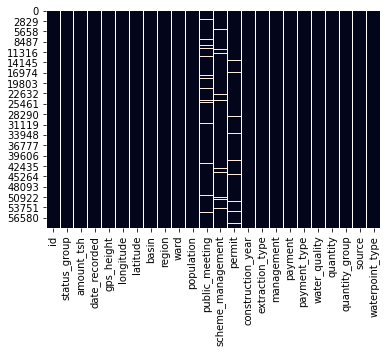

In [6]:
# nans
data_full.isnull().sum()

# niby ladny wykres NA, ale srednio dziala, kiedys bledy znalazlem, mimo, ze kod wydaje sie
# byc ok
sns.heatmap(data_full.isnull(), cbar=False)
plt.show()

In [7]:
#outliery z-score
z = np.abs(stats.zscore(data_full.loc[:, ['amount_tsh', 'gps_height', 'population', 'construction_year']]))
np.where(z > 3)

data_no_outliers = data_full[(z < 3).all(axis=1)]

<AxesSubplot:xlabel='status_group', ylabel='population'>

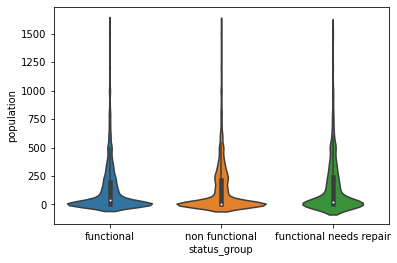

In [8]:
sns.violinplot(x='status_group', y='population', data=data_no_outliers)

<AxesSubplot:xlabel='status_group', ylabel='amount_tsh'>

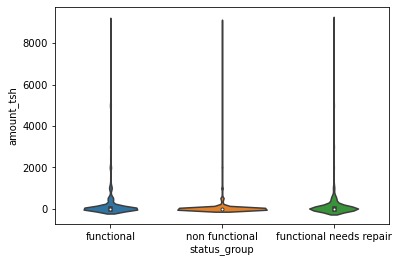

In [9]:
sns.violinplot(x='status_group', y='amount_tsh', data=data_no_outliers)

<AxesSubplot:xlabel='status_group', ylabel='gps_height'>

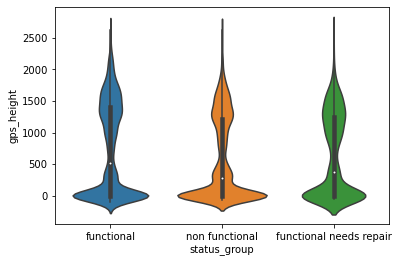

In [10]:
sns.violinplot(x='status_group', y='gps_height', data=data_no_outliers)

<AxesSubplot:xlabel='status_group', ylabel='construction_year'>

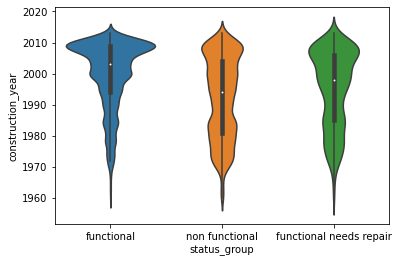

In [11]:
# tutaj jest duzo NA, jako 0, a wiec niewiadomo kiedy powstala studnia
# wykres ponizej pomija te 0
sns.violinplot(x='status_group', y='construction_year', data=data_no_outliers[data_no_outliers['construction_year'] > 1900])

In [ ]:

lng = data_full['longitude'].mean()
lat = data_full['latitude'].mean()

m = folium.Map(location=[lat, lng], zoom_start=5)

In [ ]:
m_2 = folium.Map(location=[lat, lng], zoom_start=6)
HeatMap(data=data_full[['latitude', 'longitude']], radius=14).add_to(m_2)
m_2

In [12]:
print('xDDDDDDDDDDD')

xDDDDDDDDDDD


In [16]:
#probka danych
data_sample = data_no_outliers.sample(n=1000)

In [27]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 54086 to 7483
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   status_group       1000 non-null   object 
 2   amount_tsh         1000 non-null   float64
 3   date_recorded      1000 non-null   object 
 4   gps_height         1000 non-null   int64  
 5   longitude          1000 non-null   float64
 6   latitude           1000 non-null   float64
 7   basin              1000 non-null   object 
 8   region             1000 non-null   object 
 9   ward               1000 non-null   object 
 10  population         1000 non-null   int64  
 11  public_meeting     947 non-null    object 
 12  scheme_management  935 non-null    object 
 13  permit             955 non-null    object 
 14  construction_year  1000 non-null   int64  
 15  extraction_type    1000 non-null   object 
 16  management         1

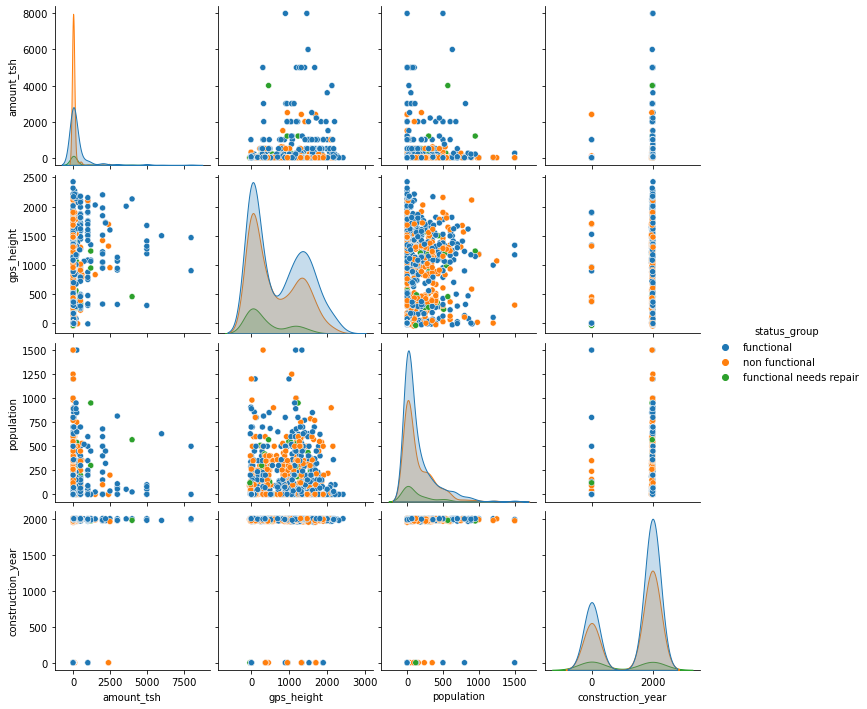

In [32]:
#gurwa to nie jest jak ggpair w R, gowno tylko do ilosciowych
sns.pairplot(data_sample[['status_group', 'amount_tsh', 'gps_height', 'population', 
                          'construction_year']], hue='status_group')